# BEM 1025: Programming for Business Analytics - Final exam prep

In [21]:
# we import the library pandas and give it the "pd" nickname
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### You will work on the following dataframe for this assignment
#### 30,478 Airbnb listings in New York City. This data was compiled from http://insideairbnb.com/:


In [22]:
# we load data from an excel file and select bunch of relevant columns
df=pd.read_csv('https://www.dropbox.com/s/1au68f79pst5b71/airbnb.csv?dl=1')

columns=['Host Id','Host Since','Name' \
         ,"Neighbourhood",'Property Type','Room Type','Zipcode','Beds','Number Of Reviews','Price','Review Scores Rating']
df=df[columns]
# we remove missing values
df.dropna(inplace=True)
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Number Of Reviews,Price,Review Scores Rating
0,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,Private room,10036.0,3.0,39,549,96.0
1,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,Entire home/apt,11222.0,1.0,4,149,100.0
2,1783,2008-08-12,Amazing Also,Manhattan,Apartment,Entire home/apt,10004.0,1.0,9,250,100.0
3,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,Private room,11201.0,1.0,80,90,94.0
4,2339,2008-08-20,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,Entire home/apt,10009.0,2.0,95,270,90.0


In [23]:
df.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood', 'Property Type',
       'Room Type', 'Zipcode', 'Beds', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22010 entries, 0 to 22009
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Host Id               22010 non-null  int64  
 1   Host Since            22010 non-null  object 
 2   Name                  22010 non-null  object 
 3   Neighbourhood         22010 non-null  object 
 4   Property Type         22010 non-null  object 
 5   Room Type             22010 non-null  object 
 6   Zipcode               22010 non-null  float64
 7   Beds                  22010 non-null  float64
 8   Number Of Reviews     22010 non-null  int64  
 9   Price                 22010 non-null  int64  
 10  Review Scores Rating  22010 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 1.8+ MB


## Task 1
### Find properties with 3 or more bedrooms, price range 100-700 (including 100 and 700), rated above 90 and containing word 'stops' or 'subway' in their names.

### **OUTCOME:** Provide the **head** and **shape** of the outcome dataframe

In [25]:
filter_1=(df['Beds']>=3) & (df['Price']>=100) & \
    (df['Price']<=700) & (df['Review Scores Rating']>90) & \
    ((df['Name'].str.contains('stops'))|df['Name'].str.contains('subway'))

In [26]:
df[filter_1].head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Number Of Reviews,Price,Review Scores Rating
1233,250209,2010-10-01,"2Br -Gorgeous, Clean, near subways",Manhattan,Apartment,Entire home/apt,10025.0,3.0,16,275,91.0
1623,324859,2010-12-22,Quality 1br 2 stops from Midtown,Manhattan,Apartment,Entire home/apt,10030.0,3.0,206,169,93.0
2964,928984,2011-08-05,Large 2BR 2BTH 1 block from subway,Brooklyn,Apartment,Entire home/apt,11215.0,4.0,4,248,100.0
5116,2007928,2012-03-26,3BR/2BA Duplex - 1min to subway!,Brooklyn,Apartment,Entire home/apt,11233.0,6.0,38,239,96.0
7978,3998751,2012-10-28,"With garden, close to subway, park.",Brooklyn,Apartment,Entire home/apt,11215.0,3.0,5,200,100.0


In [27]:
df[filter_1].shape

(13, 11)

## Task 2 
### Find the 5 most expensive zipcodes to rent Airbnb in NYC

### **OUTCOME:** Provide the list of the 5 zipcodes (and their corresponding neighbourhoods)
### Tip: you need to find the average price for all given zipcodes (and their corresponding neighbourhood) and then sort them descendingly by price

In [28]:
df.groupby(['Zipcode','Neighbourhood'])[['Price']].mean(). \
    reset_index().sort_values(by='Price',ascending=False).head(5)

,Zipcode,Neighbourhood,Price
141,11356.0,Queens,420.000000
50,10286.0,Manhattan,295.000000
7,10007.0,Manhattan,290.913043
142,11357.0,Queens,279.000000
57,10307.0,Staten Island,279.000000


## Task 3
### Transform the dataframe into a long dataframe to include a column representing Neighbourhood, Property Type, and Room Type and a column representing its value

### **OUTCOME:** Provide the **head** and **shape** of the outcome

In [29]:
df_melt=df.melt(id_vars=['Host Id','Host Since','Name','Zipcode','Beds'\
                         ,'Number Of Reviews','Price','Review Scores Rating'],
                        value_vars=['Neighbourhood', 'Property Type',  'Room Type'])
df_melt.head()

,Host Id,Host Since,Name,Zipcode,Beds,Number Of Reviews,Price,Review Scores Rating,variable,value
0,500,2008-06-26,Trendy Times Square Loft,10036.0,3.0,39,549,96.0,Neighbourhood,Manhattan
1,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,11222.0,1.0,4,149,100.0,Neighbourhood,Brooklyn
2,1783,2008-08-12,Amazing Also,10004.0,1.0,9,250,100.0,Neighbourhood,Manhattan
3,2078,2008-08-15,"Colorful, quiet, & near the subway!",11201.0,1.0,80,90,94.0,Neighbourhood,Brooklyn
4,2339,2008-08-20,East Village Cocoon: 2 Bedroom Flat,10009.0,2.0,95,270,90.0,Neighbourhood,Manhattan


In [30]:
df_melt.shape

(66030, 10)

## Task 4 
### Plot the relationship between time (with monthly resolution) since the Host joined Airbnb and their average Review Scores Rating for various Room Type

### **OUTCOME:** Create a plot where x represents time (fine grained to the months) the host joined Airbnb, y represents average Review Scores Rating, and lines with different colors represent Room Type

### Tip: You need to group and average by year (use pd.Groupper and Groupby) and then plot using seaborn

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html

In [36]:
df['date_formatted']=pd.to_datetime(df['Host Since'])

In [37]:
df_year=df.groupby(['Room Type',pd.Grouper(key='date_formatted',freq='m')]).mean()\
            .reset_index()


<AxesSubplot:xlabel='date_formatted', ylabel='Review Scores Rating'>

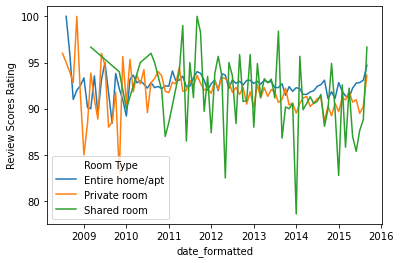

In [38]:
sns.lineplot(data = df_year,x="date_formatted", y="Review Scores Rating",hue='Room Type')

## Task 5 
### For property cheaper than 1000, Plot the relationship between Review Scores Rating  and price for various Neighbourhoods and Room Types

### **OUTCOME:** Create a facet plot where x represents 'Review Scores Rating', y represents Price, color represents Room Type, columns represent Neighborhoods
### Tip: you need to combine FacetGrid with plt.scatter

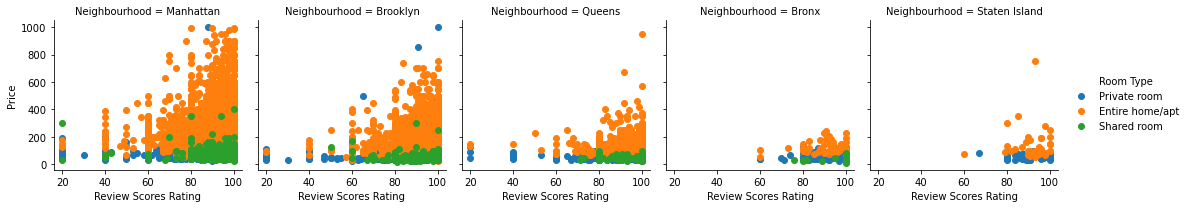

In [39]:
facet = sns.FacetGrid(df[df['Price']<1000], col='Neighbourhood', hue='Room Type')
facet = facet.map(plt.scatter, 'Review Scores Rating','Price')
facet = facet.add_legend()

## Task 6
### Create a table where Room types are on the columns, Neibourhood and Property Type are on the rows, and average price are shown in the cells 

### **OUTCOME:** Like the following table

<img src="https://www.dropbox.com/s/5b8sz7wujyhl8d3/Screen%20Shot%202021-03-02%20at%201.51.34%20PM.png?dl=1">


In [40]:
df_=df.groupby(['Neighbourhood','Room Type','Property Type'])[['Price']].mean()
df_.pivot_table(
        values='Price', 
        index=[ 'Neighbourhood','Property Type'], 
        columns=['Room Type'])

Room Type                      Entire home/apt  Private room  Shared room
Neighbourhood Property Type                                              
Bronx         Apartment             116.333333     59.518519    43.600000
              Bed & Breakfast              NaN     75.000000          NaN
              Condominium                  NaN    127.000000          NaN
              House                 142.769231     58.813559    24.250000
              Loft                  146.666667     61.500000          NaN
              Townhouse             110.000000           NaN          NaN
Brooklyn      Apartment             162.881780     77.751140    53.144144
              Bed & Breakfast       145.833333     82.270833    79.000000
              Boat                  100.000000           NaN          NaN
              Camper/RV              45.000000           NaN          NaN
              Chalet                       NaN     99.000000          NaN
              Condominium           211.636364     82.333333          NaN
              Dorm                   49.000000     82.166667    53.750000
              House                 255.162234     79.282651    39.631579
              Lighthouse             39.000000           NaN          NaN
              Loft                  222.677966     90.030928    59.000000
              Other                 124.333333    116.000000    70.000000
              Townhouse             213.258065     88.800000          NaN
              Treehouse                    NaN           NaN   300.000000
Manhattan     Apartment             220.137880    103.018272    80.351648
              Bed & Breakfast       292.500000    124.930233          NaN
              Cabin                 250.000000           NaN          NaN
              Castle                       NaN    150.000000          NaN
              Condominium           321.600000     84.333333          NaN
              Dorm                         NaN     85.000000    80.000000
              House                 442.397436    105.693878          NaN
              Hut                          NaN     50.000000          NaN
              Loft                  413.519380    135.809524   126.800000
              Other                 488.666667    193.777778   212.500000
              Townhouse             471.333333     68.250000          NaN
              Treehouse                    NaN           NaN   101.500000
              Villa                 299.000000    195.000000          NaN
Queens        Apartment             129.853211     70.721190    50.219512
              Bed & Breakfast       112.500000     70.240000          NaN
              Boat                  164.000000           NaN          NaN
              Bungalow              143.666667           NaN          NaN
              Cabin                        NaN     80.000000          NaN
              Camper/RV              79.000000     39.000000          NaN
              Condominium           168.500000           NaN          NaN
              Dorm                         NaN     58.000000    45.000000
              House                 181.826087     65.184000    47.555556
              Loft                  178.666667     75.428571          NaN
              Other                 120.000000     54.666667          NaN
              Townhouse             100.000000     67.500000          NaN
              Villa                 120.000000    103.333333          NaN
Staten Island Apartment             126.400000     48.153846          NaN
              Bed & Breakfast       129.000000           NaN          NaN
              House                 444.222222     61.975000          NaN
              Other                        NaN     68.000000          NaN
              Townhouse                    NaN     57.000000          NaN

# 